In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from datetime import datetime
from nrt_wind.wind import read_wind_mag

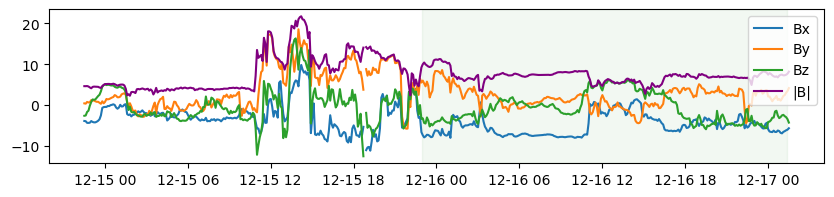

In [3]:
st='2023-12-16 00:00:00'
et='2023-12-16 01:00:00'
imgPath='./nrt_wind/'
npoint=256
window_duration=24 #in hours
l=int(np.round(window_duration*60./npoint)) 

tts=pd.to_datetime((datetime.strptime(str(st), "%Y-%m-%d %H:%M:%S")-datetime(1970, 1, 1, 0, 0)).total_seconds()-l*npoint*60.,unit='s')
tte=pd.to_datetime((datetime.strptime(str(st), "%Y-%m-%d %H:%M:%S")-datetime(1970, 1, 1, 0, 0)).total_seconds()+l*npoint*60.,unit='s')

df= read_wind_mag( tts,tte)
bxn=df.Bx.rolling(window=l,step=l).mean()
byn=df.By.rolling(window=l,step=l).mean()
bzn=df.Bz.rolling(window=l,step=l).mean()  
plt.figure(figsize=(10, 2))
plt.plot(bxn,label='Bx')
plt.plot(byn,label='By')
plt.plot(bzn,label='Bz')
plt.plot(np.sqrt(bxn*bxn+byn*byn+bzn*bzn),label='|B|',color='purple')
plt.legend()
if os.path.exists(imgPath+'List2.txt')!=0 and os.path.getsize(imgPath+'List2.txt') != 0:
     df_list2= pd.read_csv(imgPath+'List2.txt', sep=" ", header=None)
     for i in df_list2.index:
          FR_s_l2=pd.to_datetime(df_list2[0][i]+' '+df_list2[1][i])
          FR_e_l2=pd.to_datetime(df_list2[2][i]+' '+df_list2[3][i])
          plt.axvspan(FR_s_l2,FR_e_l2, ymin=0, ymax=1, alpha=0.05, color='green')
if os.path.exists(imgPath+'Final_list.txt')!=0 and os.path.getsize(imgPath+'Final_list.txt') != 0:
     for i in df_list2.index:
          df_final= pd.read_csv(imgPath+'Final_list.txt', sep=" ", header=None)
          FR_s=pd.to_datetime(df_final[0][i]+' '+df_final[1][i])
          FR_e=pd.to_datetime(df_final[2][i]+' '+df_final[3][i])
          # if df_final[7][i]!=0:
          if df_final[4][i]!=0:               
               plt.axvspan(FR_s,FR_e, ymin=0, ymax=1, alpha=0.1, color='green')
